# Исследование закономерностей успешности компьютерных игр

**Описание проекта**

 В нашем распоряжении csv-файл интернет-магазина — данные за несколько лет о продаже компьютерных игр по всему миру, включая оценки пользователей и экспертов, жанры и платформы.
 Наша задача — выполнить предобработку данных и изучить их, чтобы выявить определяющие успешность игры закономерности, это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 
 В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр.

**Описание данных**

Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).\
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*«EC» («Early childhood») — «Для детей младшего возраста»\
«K-A» («Kids to Adults»)— «Для детей и взрослых»\
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»\
«T» («Teen») — «Подросткам»\
«E» («Everyone») — «Для всех»\
«M» («Mature») — «Для взрослых»\
«AO» («Adults Only 18+») — «Только для взрослых»\
«RP» («Rating Pending») — «Рейтинг ожидается»*

### Откроем файл с данными и изучим общую информацию.

In [97]:
#импортируем нужные библиотеки
import pandas as pd  
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from scipy import stats as st

In [98]:
#загрузим датафрейм в переменную 'data'
try:
   data = pd.read_csv('/datasets//games.csv')
except:
   data = pd.read_csv('https://code.s3.yandex.net/datasets//games.csv')

In [99]:
#сделаем копию исходных данных
data_copy = data.copy(deep=True) 

In [100]:
#общая информация о наборе данных, индекс, столбцы и тип данных, ненулевые значения и использование памяти
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [101]:
data.columns = data.columns.str.lower() #приведем названия столбцов к нижнему регистру

In [102]:
data.head(10) #выведем на экран первые 10 строк

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [103]:
data.tail() #и последние пять

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [104]:
data.describe(include = "all")#выведем числовую статистическую сводку, чтобы узнать распределение данных в каждом столбце,
# метод показывает нам количество строк - count, среднее значение - mean, стандартное отклонение - std, минимальные (min) 
# и максимальные (max) значения, а также границу каждого квартиля - 25%, 50% и 75%.
# Для категориальных признаков - сколько уникальных значений в наборе данных - unique; top значения; частота - freg

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [105]:
data.isnull().sum() #оценим количество пропущенных значений в каждом столбце

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

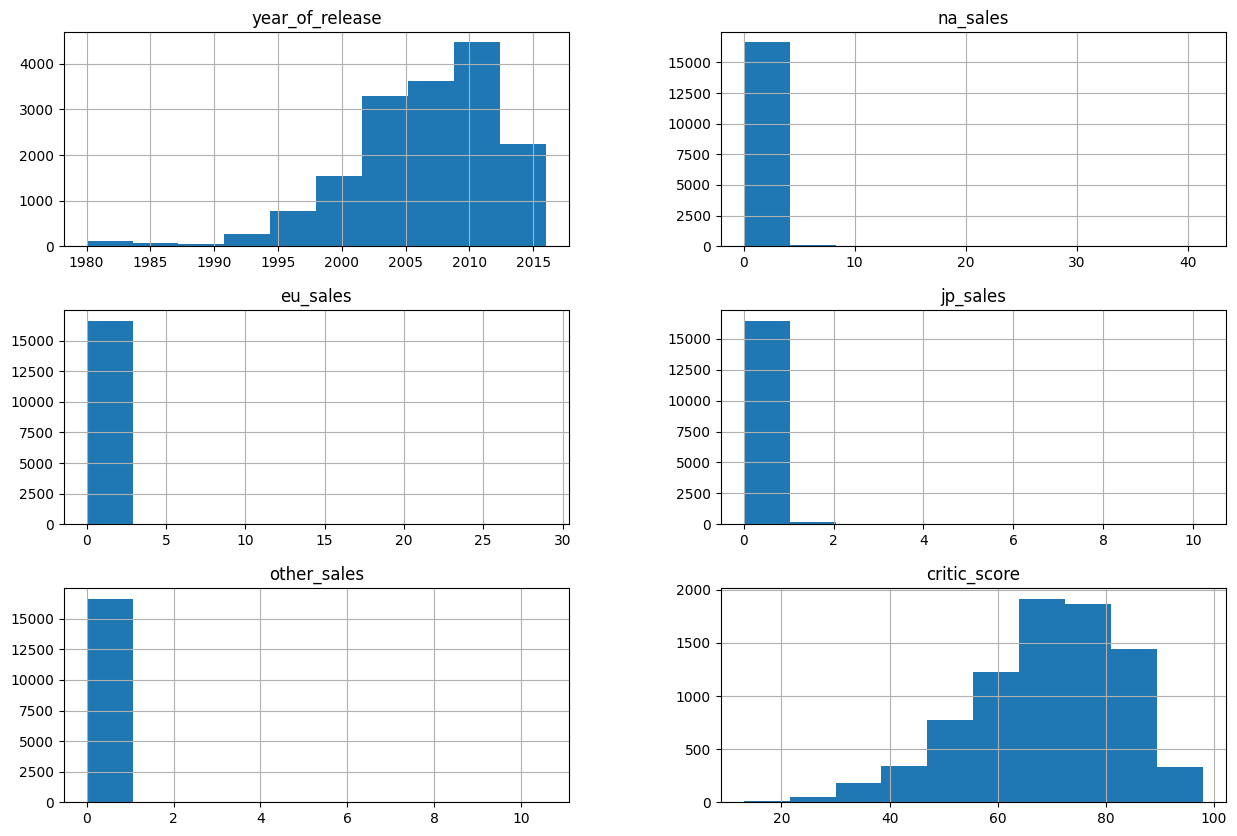

In [106]:
data.hist(figsize=(15, 10));#визуализируем общие данные

*Общая предварительная оценка данных: набор данных достаточен для интеллектуального анализа, но есть пропуски, аномалии и выбросы, присутствуют явные и неявные дубликаты, неправильные типы. Как говорится "Мусор на входе - мусор на выходе" займемся качеством данных, начнем с предобработки:*

### Предобработка данных

**2.1 Исследование и заполнение пропусков**

In [107]:
#Выведем долю пропущенных значений для каждого столбца датафрейма
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
name,0.0
platform,0.0
year_of_release,1.6
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0
other_sales,0.0
critic_score,51.3
user_score,40.1


<div class="alert alert-info">Больше всего пропусков в оценках критиков, игроков и рейтингах игр. Пропуски в рейтинге связаны с региональными отличиями ассоциаций, ESRB американское рейтинговое агентство, в европе есть PEGI, а в японии CERO. Связано и с датами выхода - статистики оценок и рейтинга игр еще не существовало: к примеру ESRB , была основана в 1994 году

<div class="alert alert-info">Есть много причин появления пропусков, например технические - ошибки системы, при передаче, выгрузке данных или допущены  пользователем - неправильный ввод или нежелание (сокрытие) информации.
Рассмотрим пропуски подробнее по столбцам:

In [108]:
#выведем на экран только количество пропусков по столбцам
data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

name                  2
year_of_release     269
genre                 2
critic_score       8578
user_score         6701
rating             6766
Name: nans, dtype: int64

In [109]:
#строки с пропущенными названиями
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


*Видим эти две игры с пропусками в 'name' и 'genre' с годом выхода 1993 и невысокими продажами, удаление не повлияет на результаты исследования*

In [110]:
#выведем с пропусками год выхода игры
data[data['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [111]:
#и последние
data[data['year_of_release'].isna()].tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.0,0.0,0.0,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.0,0.0,0.0,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.0,0.0,0.0,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.0,0.0,0.0,55.0,5.5,T


<div class="alert alert-info">Всего 271 строка, это 1,6 % от всего датафрейма. Видим в некоторых названиях года выхода игр, невысокие продажи, и часто нулевые. Лидеров здесь явно нет, заполнение значений не имеет смысла для исследования, уделение не повлияет на основную цель   

In [112]:
#количество строк до удаления
data.shape

(16715, 11)

In [113]:
#удалим две строки с пропусками в названии'name' и 269 с пропусками год выхода 'year_of_release'
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])

In [114]:
data.shape#удалили 271 строку

(16444, 11)

<div class="alert alert-info">Значения в столбцах с оценками и рейтингом необходимы для исследования, пропусков много и удалять мы их не будем. Для дальнейшей работы с данными заполним (и запомним!) их нулевыми значениями.

In [115]:
#на данном этапе заполним пропущенные значения в столбцах 'critic_score', 'user_score' и 'rating' нулями
data= data.fillna(0)
data = data.reset_index(drop=True) #и сбросим индекс  

In [116]:
data.isnull().sum() #проверим количество пропущенных значений

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

*Пропусков нет, приступим к типам данных*

**2.3 Изменение типов данных**

In [117]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

*Год выхода игр 'year_of_release' и оценки критиков 'critic_score' переведем из вещественного типа в целочисленный*

In [118]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')

<div class="alert alert-info">Столбец 'user_score' определился как 'object', выведем все уникальные значения

In [119]:
data['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div class="alert alert-info">Видим причину: слово 'tbd' - To Be Determined, то есть "Будет определено". Для замены воспользуемся методом replace

In [120]:
#заменим 'tbd' на числовое значение "0" 
data = data.replace({'user_score':{'tbd':0}})

In [121]:
#и приведем к вещественному типу
data['user_score'] = data['user_score'].astype('float')

In [122]:
#год выхода 'year_of_release' преобразуем в формат даты год
data['year_of_release'] = pd.array(data['year_of_release'], dtype=pd.Int64Dtype())

In [123]:
data.dtypes # проверим типы данных

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int32
user_score         float64
rating              object
dtype: object

<div class="alert alert-info">С типами данных все в порядке. Проверим явные и неявные дубликаты.

**2.4 Обработка дубликатов**

In [124]:
data.duplicated().sum()#обратимся ко всему датафрейму

0

<div class="alert alert-info">Проверим пару Название - Платформа

In [125]:
#количество дубликатов, строк с одинаковыми значениями только в этих двух столбцах
data.duplicated(subset=['name','platform']).sum()

3

In [126]:
data[data.duplicated(subset=['name','platform'])]#выведем дубликаты

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83,5.5,E


<div class="alert alert-info">Перезапишем data и удалим из самого датафрейма строки с явными дубликатами, оставив только первые вхождения: будем считать, что верные идентификаторы  встречаются первыми 

In [127]:
data.shape#количество строк

(16444, 11)

In [128]:
data = data.drop_duplicates(subset=['name','platform'], keep='first')

In [129]:
data.shape#минус три явных дубликата

(16441, 11)

**2.5 Добавим новый столбец суммарных продаж**

In [130]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [131]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0,31.38


<div class="alert alert-info">Данные прошли обработку и соответствуют неоходимому уровню качества для дальнейшего анализа и проверке гипотез

###  Проведем исследовательский анализ данных

3.1 Годовые показатели выпуска игр. Важны ли данные за все периоды?

In [197]:
data['year_of_release'].value_counts()#выведем показатели выхода в порядке убывания

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     938
2002     829
2003     775
2004     762
2012     651
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
Name: year_of_release, dtype: Int64

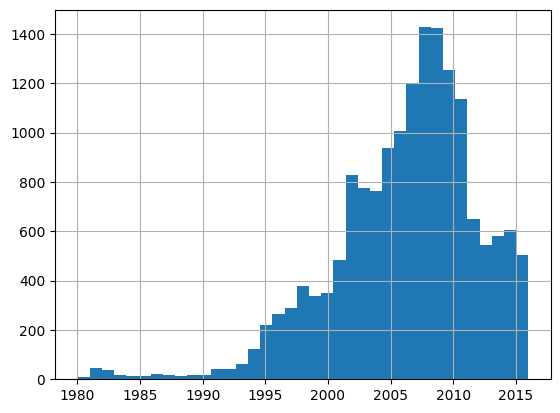

In [133]:
data['year_of_release'].hist(bins=37); #гистограмма поможет визуализировать картину

*C 2006 по 2011 ежегодно более 1000 выходов новых игр на рынок, с рекокдом в 2008 году - 1427 игр. С 1995 по 2008 год наблюдается практически постоянный рост: в молодой мир компьютерных игр приходят новые разработчики, появляется множество "свежих" идей и  новых жанров, инновационных разработок в "железе"и появление 3D графики, компьютеры становятся доступнее, совершенствуются игровые консоли  - формируется индустрия, а компьютерные игры становятся частью поп-культуры.*   

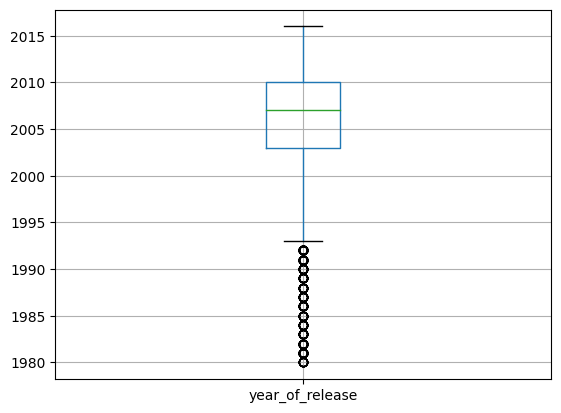

In [134]:
 data.boxplot(column='year_of_release');#построим диаграмму размаха выхода новых игр

*Можно увидеть характеристики распределения - большая часть значений лежит в диапазоне с 2003 по 2010 годы, квартили 1993 и 2016 годы. Выбросы значений находятся до 1993 года. Сделаем срез нужного нам участка для дальнейшего анализа.*

In [194]:
#перезапишем датафрейм используя метод query: без выбросов, начиная с 1994 года, со сбросом индекса
data = data\
    .query('year_of_release >= 1994')\
    .reset_index(drop=True)

3.2 Продажи по платформам.

In [193]:
#выведем топ 10 платформ по продажам
data\
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending=False)\
    .head(10)

,total_sales
platform,
PS2,1233.56
X360,959.99
PS3,931.33
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [198]:
#список топ 10 платформ по продажам
data\
    .groupby('platform')['total_sales']\
    .sum().sort_values(ascending=False)\
    .head(10)\
    .index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

In [199]:
#запишем в новую переменную топ 10 платформ
top_10 = data\
    .groupby('platform')['total_sales']\
    .sum().sort_values(ascending=False)\
    .head(10)\
    .index\
    .tolist()

In [201]:
#новый датафрейм топ 10 платформ по продажам
data_top = data\
    .query('platform == @top_10')\
    .reset_index(drop=True)

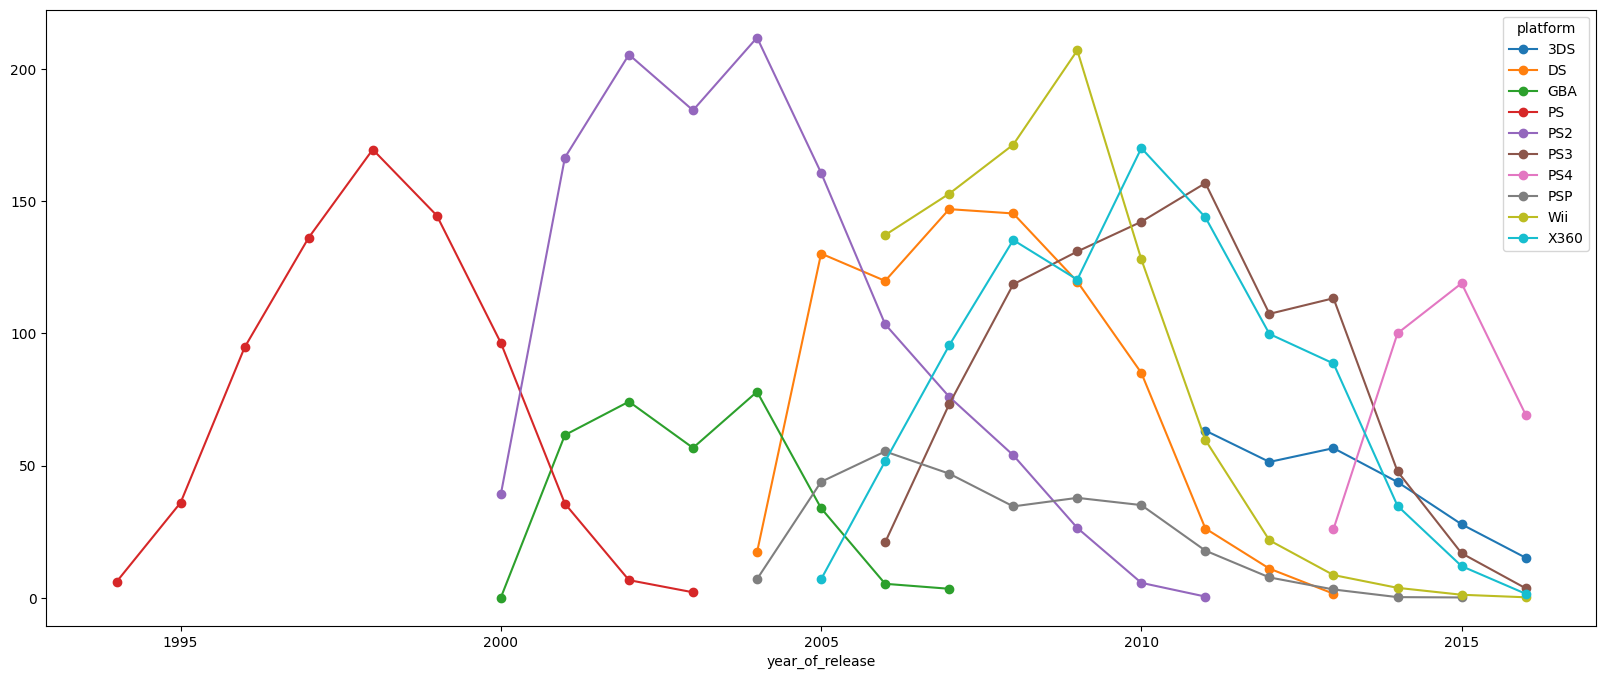

In [202]:
#построим распределение суммарных продаж платформ по годам 
data_top\
    .pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')\
    .plot.line(style='o-', figsize=(20, 8));

In [206]:
#посчитаем средний срок существования всех платформ
data\
    .groupby('platform')['year_of_release']\
    .nunique()\
    .mean()

6.793103448275862

In [207]:
#и средний срок существования топ платформ
data_top\
    .groupby('platform')['year_of_release']\
    .nunique()\
    .mean()

9.6

*В среднем платформы существуют 9-10 лет, через 4 года достигается пик продаж и начинается спад. По этой причине через 6 лет жизни платформы ей на смену приходит новая (не учитывая 3DS и PS4 вышедшие недавно, в 2011 и 2013 годах, а данные за 2016 год неполные).* 

3.3 Возьмем данные за актуальный период для прогноза на 2017 год.

 *Для нашего прогноза на 2017 год из исследования закономерностей успешности игр, вывления потенциально популярных продуктов и планирования рекламной кампании актуален период с 2013 по 2016 годы - рынок компьютерных игр является инновационным и чрезвычайно зависит от технологических и технических возможностей как игроков (покупателей) так и разработчиков.*

In [143]:
#создадим новый датафрейм периода 2013+
df = data\
    .query('year_of_release >= 2013')\
    .reset_index(drop=True)

In [144]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,0,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,0,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01


3.4 Выберем прибыльные платформы

In [208]:
#посмотрим на десятку платформ с наибольшими суммарными продажами
df\
    .groupby('platform')['total_sales']\
    .sum()\
    .sort_values(ascending=False)\
    .head(10)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64

In [209]:
#список пяти лучших
d_top = df\
    .groupby('platform')['total_sales']\
    .sum()\
    .sort_values(ascending=False)\
    .head(5).index.tolist()

d_top

['PS4', 'PS3', 'XOne', '3DS', 'X360']

In [210]:
#создадим датафрейм пяти лидеров 
df_top = df\
    .query('platform == @d_top')\
    .reset_index(drop=True)

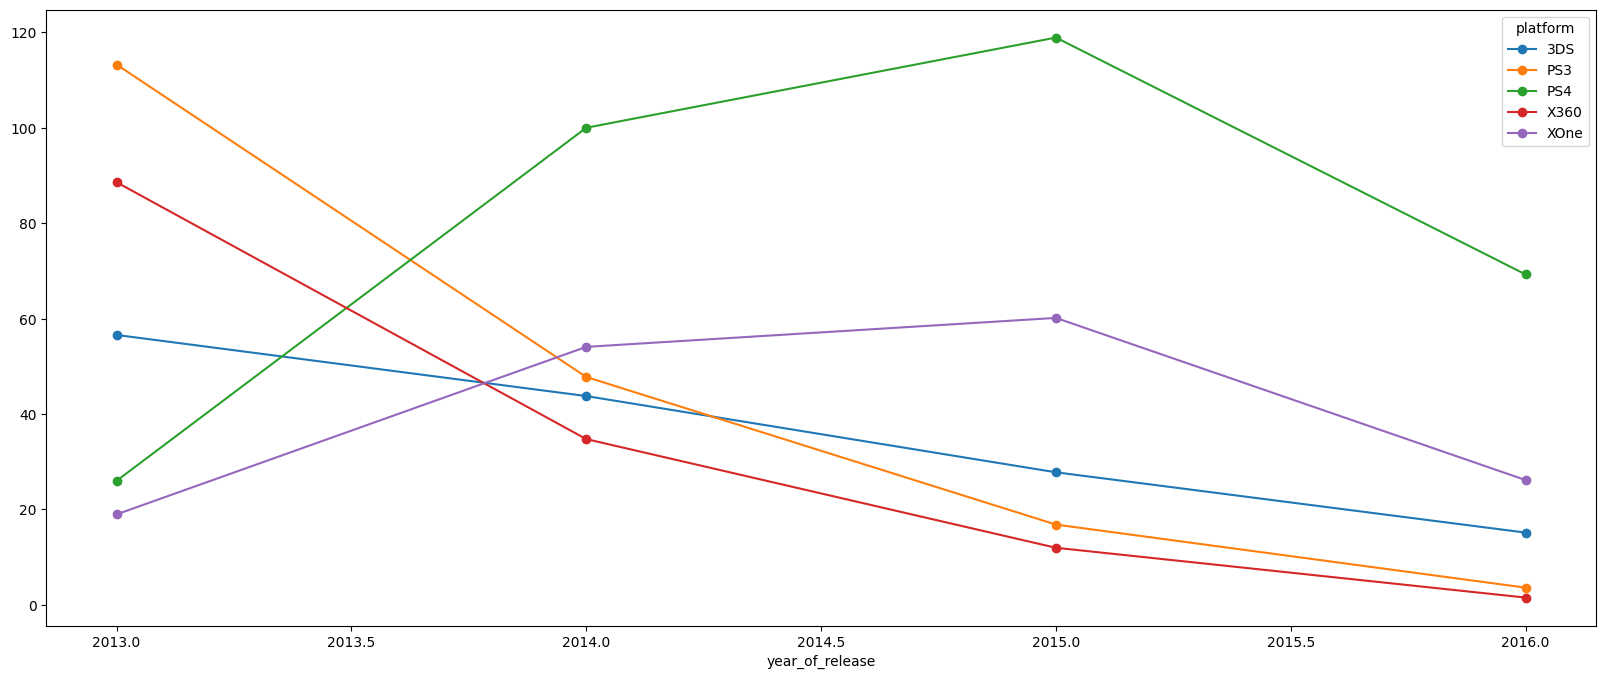

In [211]:
#построим график суммарных продаж лидирующих платформ по годам
df_top\
    .pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')\
    .plot.line(style='o-', figsize=(20, 8));

*Вот и явный лидер - PS4, у XOne тоже рост (данные за 2016 год неполные).*

3.5 Диаграмма размаха по глобальным продажам игр в разбивке по платформам.

(-1.0, 5.0)

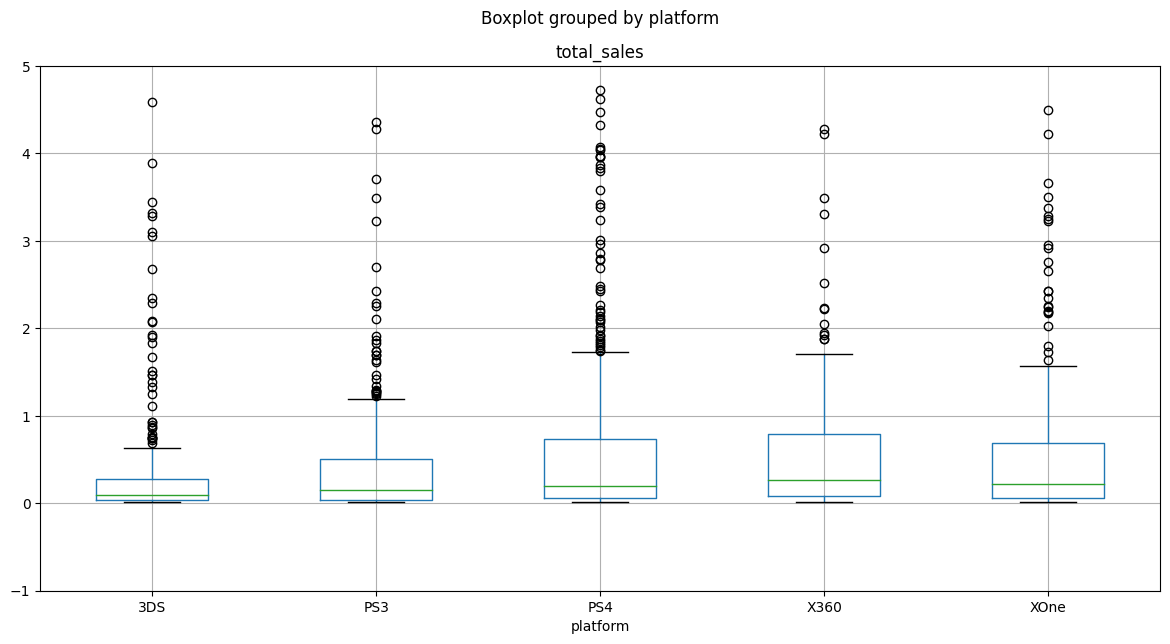

In [212]:
#для оценки характеристик распределения продаж по платформам построим "ящик с усами"
df_top.boxplot(column='total_sales', by='platform', figsize=(14, 7), grid=True);
plt.ylim(-1, 5)

<div class="alert alert-info">Увеличим график используя параметры  ylim и figsize

(0.0, 0.85)

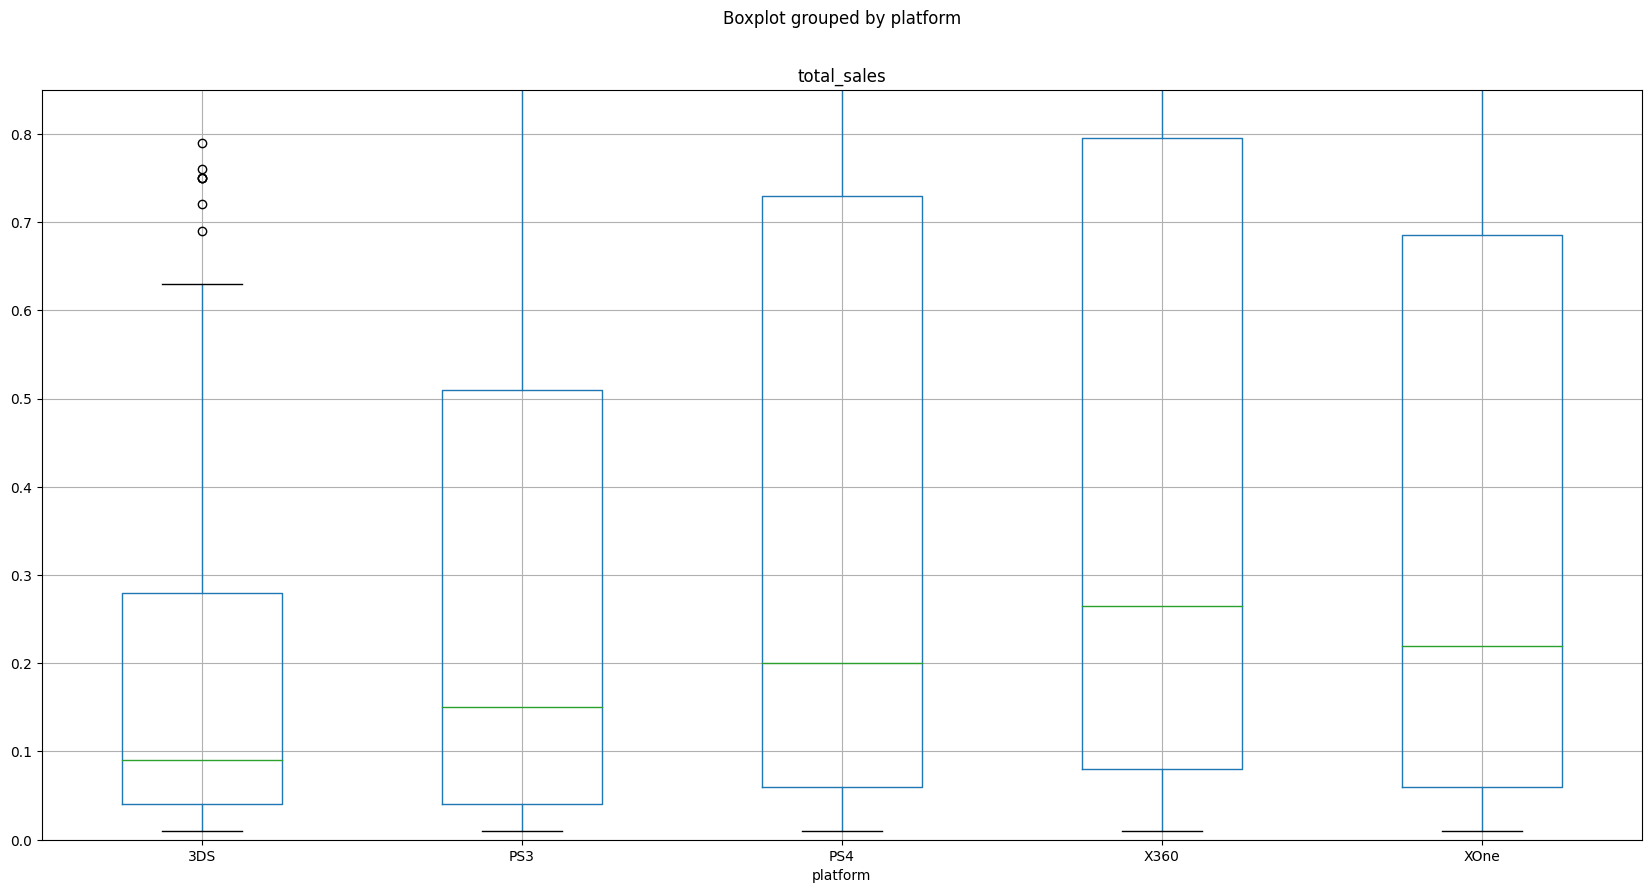

In [213]:
df_top.boxplot(column='total_sales', by='platform', figsize=(20, 10), grid=True);
plt.ylim(0, 0.85)

*Распределение данных: минимальные значения у всех платформ близки к нулю, максимальные значения у лидирующих платформ выше как и вариации (разброс), выбросы начинаются позже, за пределами верхних "усов" . Интерквартильный размах (длина "ящика") больше у PS4, X360 и XOne, как и ассиметрия распределения в сторону увеличения суммарных продаж*

3.6 Влияние отзывов на продажи лидирующей платформы

In [151]:
#сделаем срез по платформе PS4
df_PS4 = df\
    .query('platform == "PS4"')\
    .reset_index(drop=True)

In [152]:
df_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
387,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,0,0.01
388,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01
389,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01
390,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01


3.6.1 Зависимость продаж PS4 от оценок критиков

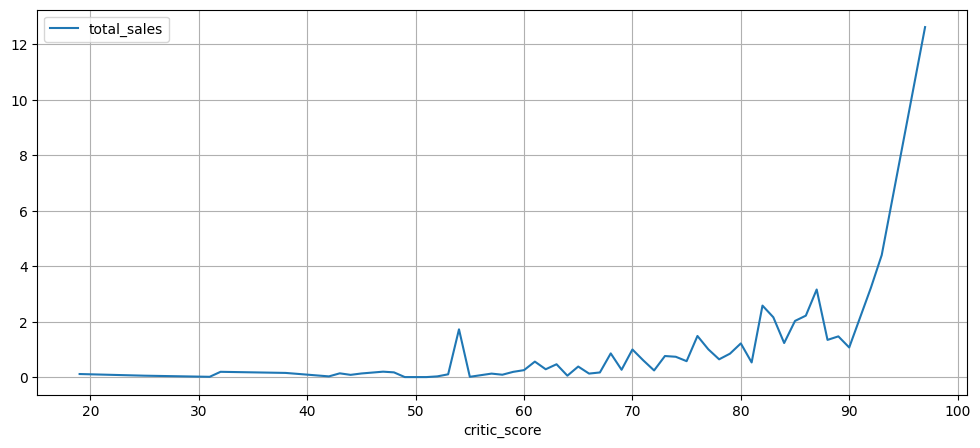

In [153]:
#построим график влияния и учтем замену пропусков в оценках на 0
df_PS4\
    .query('critic_score != 0')\
    .pivot_table(index='critic_score', values='total_sales', aggfunc='mean')\
    .plot(grid=True, figsize=(12, 5));

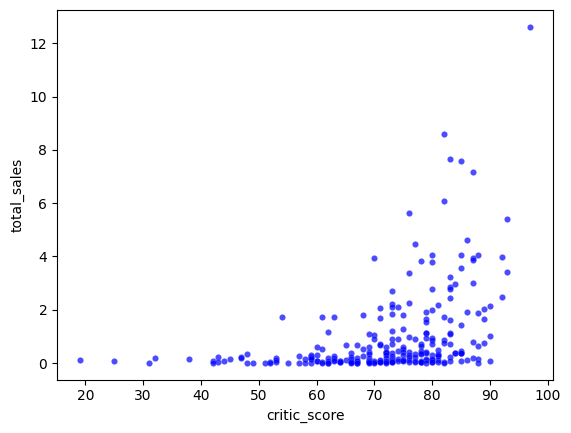

In [154]:
#диаграмма рассеивания
df_PS4\
    .query('critic_score != 0')\
    .plot(x='critic_score', y='total_sales',  color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7, kind='scatter');

In [214]:
#коэффициент корреляции
df_PS4\
    .query('critic_score != 0')['critic_score']\
    .corr(df_PS4.query('critic_score != 0')['total_sales'])

0.4065679020617816

*Положительный коэффициент 0.406 показывает взаимосвязь, высокие продажи зависимы с высокими оценками критиков*

3.6.2 Зависимость продаж PS4 от оценок пользователей

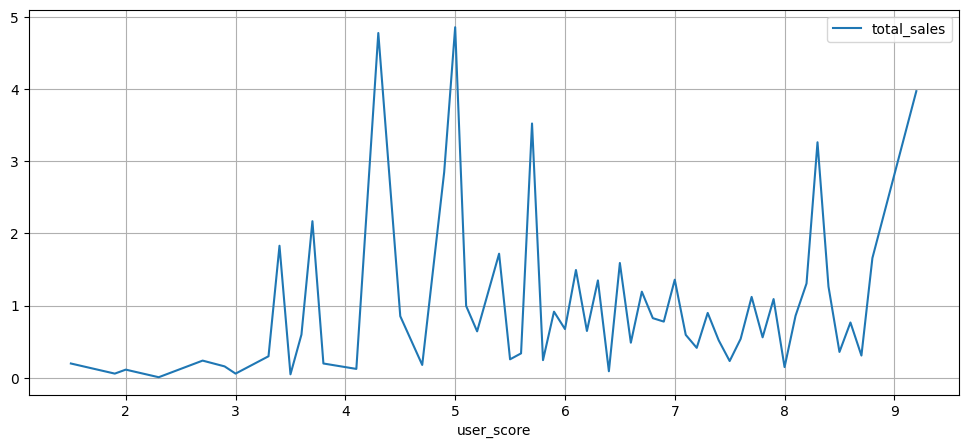

In [156]:
#построим график влияния и учтем замену пропусков в оценках на 0
df_PS4\
    .query('user_score != 0')\
    .pivot_table(index='user_score', values='total_sales', aggfunc='mean')\
    .plot(grid=True, figsize=(12, 5));

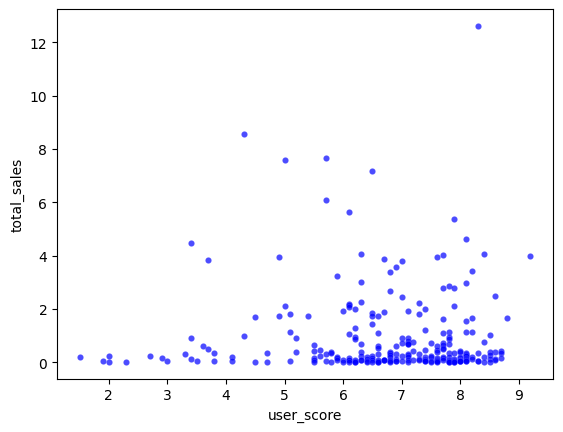

In [157]:
#диаграмма рассеивания
df_PS4\
    .query('user_score != 0')\
    .plot(x='user_score', y='total_sales',  color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7, kind='scatter');

*Большой разброс оценок*

In [158]:
#коэффициент корреляции
df_PS4\
    .query('user_score != 0')['user_score']\
    .corr(df_PS4.query('user_score != 0')['total_sales'])

-0.03195711020455643

*Небольшой отрицательный коэффициент корреляции -0.031 демонстрирует слабую обратную зависимость оценок пользователей и продаж*

3.6.3 Зависимость продаж от оценок критиков игр на других платформах.


<div class="alert alert-info">Исправил на топ пять платформ, ниже добавил зависимости XOne

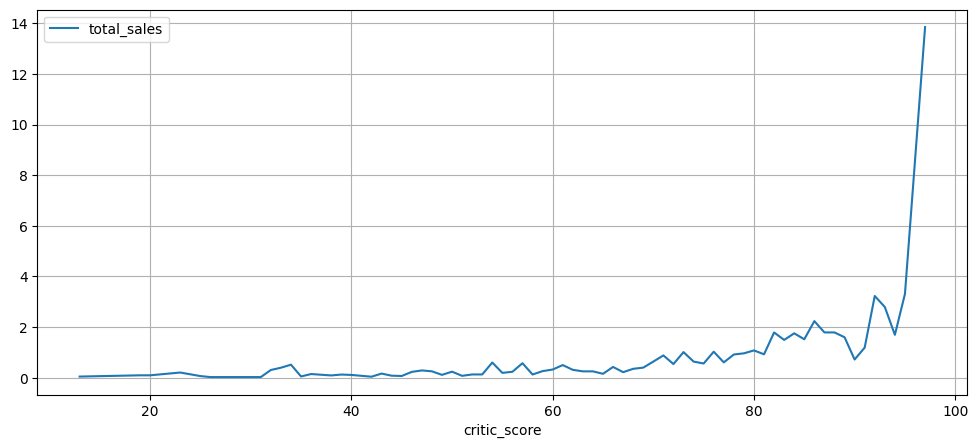

In [159]:
#график влияния и учтем замену пропусков в оценках на 0
df_top\
    .query('critic_score != 0')\
    .pivot_table(index='critic_score', values='total_sales', aggfunc='mean')\
    .plot(grid=True, figsize=(12, 5));

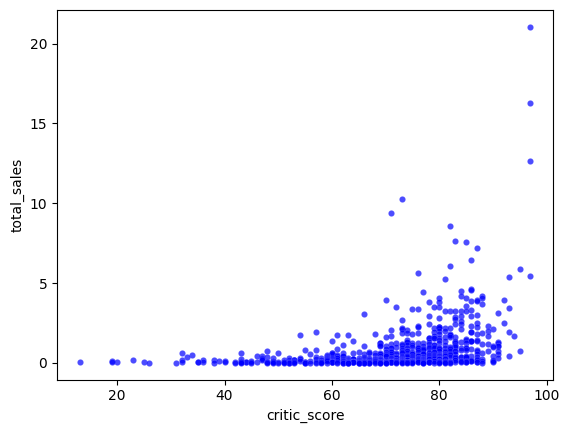

In [160]:
#диаграмма рассеивания
df_top\
    .query('critic_score != 0')\
    .plot(x='critic_score', y='total_sales',  color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7, kind='scatter');

In [161]:
#коэффициент корреляции
df_top\
    .query('critic_score != 0')['critic_score']\
    .corr(df_top.query('critic_score != 0')['total_sales'])

0.3603741896177766

 *Зависимость продаж от оценок критиков игр на других платформах положительная, коэффициент корреляци 0.36 - на 13,8% выше в сравнении с PS4*

*На всех топ платформах есть прямая взаимосвязь  оценок критиков и продаж* 

<div class="alert alert-info">Зависимость продаж от оценок критиков игр на платформе XOne 

In [162]:
df_XOne = df\
    .query('platform == "XOne"')\
    .reset_index(drop=True)

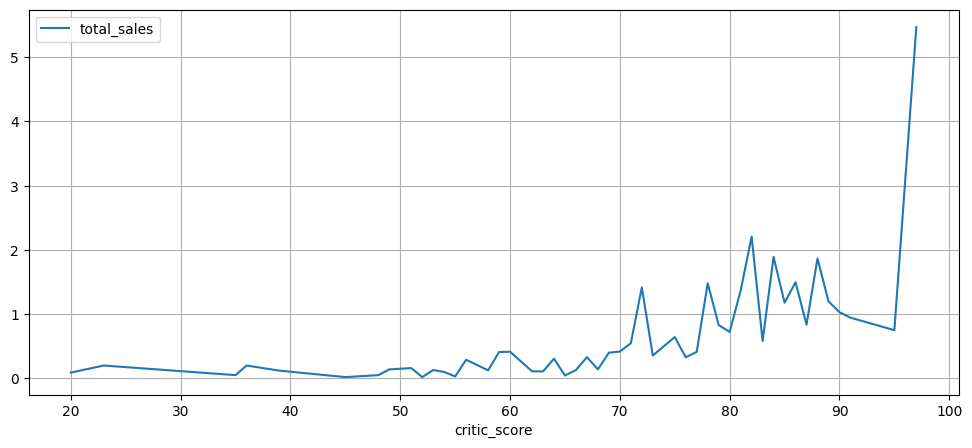

In [163]:
#график влияния и учтем замену пропусков в оценках на 0
df_XOne\
    .query('critic_score != 0')\
    .pivot_table(index='critic_score', values='total_sales', aggfunc='mean')\
    .plot(grid=True, figsize=(12, 5));

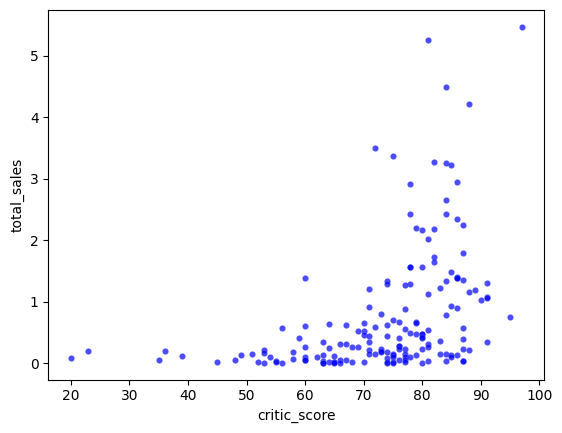

In [164]:
#диаграмма рассеивания
df_XOne\
    .query('critic_score != 0')\
    .plot(x='critic_score', y='total_sales',  color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7, kind='scatter');

In [165]:
#коэффициент корреляции
df_XOne\
    .query('critic_score != 0')['critic_score']\
    .corr(df_XOne.query('critic_score != 0')['total_sales'])

0.4169983280084017

<div class="alert alert-info"> Положительный коэффициент у XOne 0.416 показывает взаимосвязь с высокими оценками критиков, выше чем у PS4 (0.406)

3.6.4 Зависимость продаж от оценок пользователей игр на других платформах

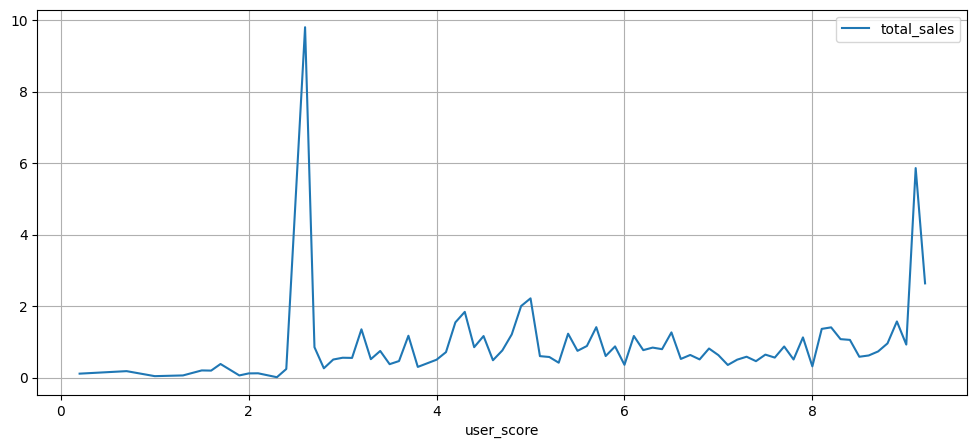

In [166]:
#график влияния и учтем замену пропусков в оценках на 0
df_top\
    .query('user_score != 0')\
    .pivot_table(index='user_score', values='total_sales', aggfunc='mean')\
    .plot(grid=True, figsize=(12, 5));

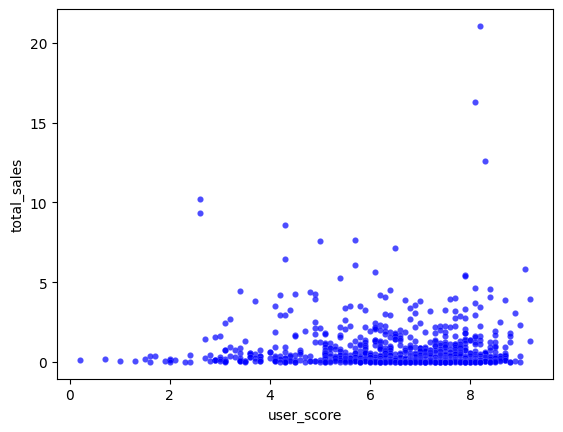

In [167]:
#диаграмма рассеивания
df_top\
    .query('user_score != 0')\
    .plot(x='user_score', y='total_sales',  color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7, kind='scatter');

In [168]:
#коэффициент корреляции
df_top\
    .query('user_score != 0')['user_score']\
    .corr(df.query('user_score != 0')['total_sales'])

-0.004021085714691045

*Обратная зависимость стремится к нулю, отрицательный коэффициент корреляции -0.004 оценок пользователей и продаж*

*Между оценками игроков и суммарными продажами по всем платформам нет зависимости, корреляция отрицательная.* 

<div class="alert alert-info"> Зависимость продаж от оценок пользователей игр на платформе XOne 

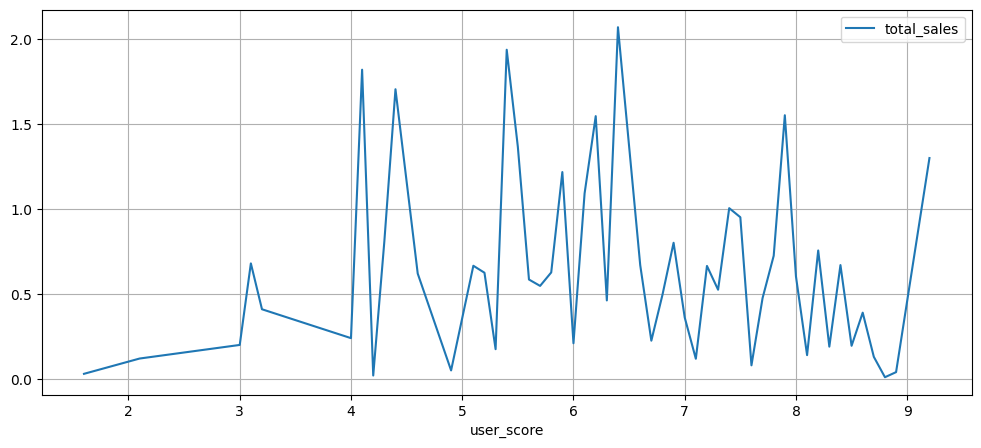

In [169]:
#график влияния и учтем замену пропусков в оценках на 0
df_XOne\
    .query('user_score != 0')\
    .pivot_table(index='user_score', values='total_sales', aggfunc='mean')\
    .plot(grid=True, figsize=(12, 5));

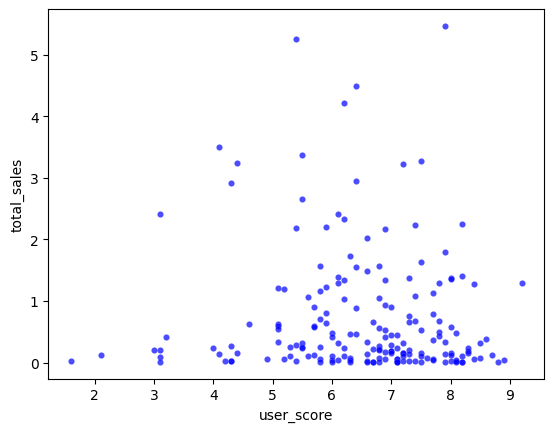

In [170]:
#диаграмма рассеивания
df_XOne\
    .query('user_score != 0')\
    .plot(x='user_score', y='total_sales',  color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7, kind='scatter');

In [171]:
#коэффициент корреляции
df_XOne\
    .query('user_score != 0')['user_score']\
    .corr(df_XOne.query('user_score != 0')['total_sales'])

-0.06892505328279416

<div class="alert alert-info"> Низкая обратная зависимость, отрицательный коэффициент корреляции -0.068 оценок пользователей и продаж у XOne

3.7 Общее распределение игр, самые прибыльные жанры.

In [172]:
#количество вышедших игр по жанрам с 2013 года
df['genre'].value_counts()
 

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

*Больше всего игр выходит в жанре - Action, с большим отрывом следуют Role-Playing, Adventure, Sports, Shooter и Misc*

<div class="alert alert-info">Видим что количество вышедших игр в жанре Action намного превышает остальные. Суммарные продажи покажут лишь весь количественный объем продаж. Для выявления наиболее прибыльного жанра будем использовать медианные показатели. 

In [173]:
#жанры с наибольшими медианными продажами
df\
    .pivot_table(index='genre', values='total_sales', aggfunc='median')\
    .sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


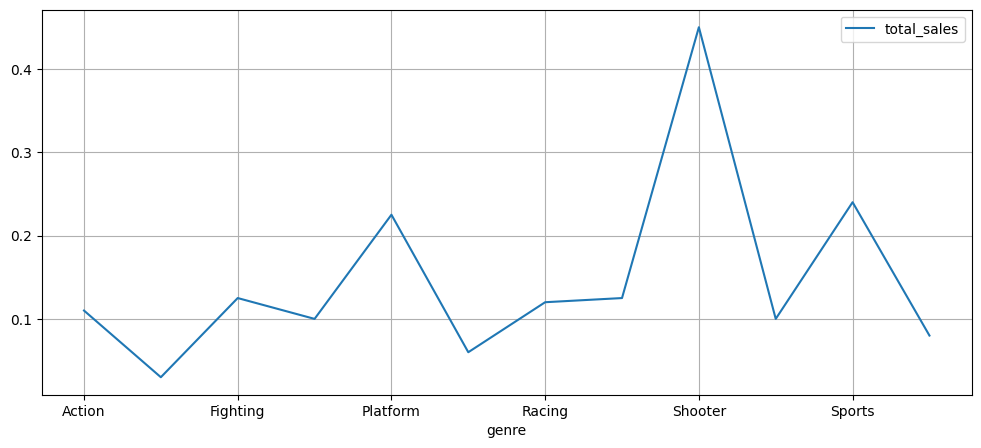

In [174]:
df\
    .pivot_table(index='genre', values='total_sales', aggfunc='median')\
    .plot(grid=True, figsize=(12, 5));

<div class="alert alert-info">Жанр Shooter с отрывом лидирует по объемам продаж, следом Sports и Platform 

In [175]:
#медиана топ 3 прибыльных жанра с 2013 года
df\
    .pivot_table(index='genre', values='total_sales', aggfunc='median')\
    .sort_values(by='total_sales', ascending=False)\
    .head(3)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225


In [176]:
#медиана продаж 3 жанров, последних по продажам
df\
    .pivot_table(index='genre', values='total_sales', aggfunc='median')\
    .sort_values(by='total_sales', ascending=False)\
    .tail(3)

,total_sales
genre,
Strategy,0.08
Puzzle,0.06
Adventure,0.03


In [177]:
len(df['genre'].unique())#количество жанров

12

In [178]:
#сумма медианных топ 3 
df\
    .pivot_table(index='genre', values='total_sales', aggfunc='median')\
    .sort_values(by='total_sales', ascending=False)\
    .head(3)\
    .sum()

total_sales    0.915
dtype: float64

In [179]:
#сумма медианных оставшихся из 12
df\
    .pivot_table(index='genre', values='total_sales', aggfunc='median')\
    .sort_values(by='total_sales', ascending=False)\
    .tail(9)\
    .sum()

total_sales    0.85
dtype: float64

<div class="alert alert-info"> Выделим три жанра: Shooter, Sports и Platform, отметим что Shooter на 87% прибыльнее следующего за ним Sports. С другой стороны самые невыгодные три жанра - Adventure, Puzzle и Strategy. 

### Портрет пользователя регионов(NA, EU, JP).

4.1 Северная америка (NA).

In [180]:
#топ 5 платформ по продажам в NA
df\
    .groupby('platform')['na_sales']\
    .sum().sort_values(ascending=False)\
    .head(5)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [181]:
#топ 5 жанров по продажам в NA
df\
    .groupby('genre')['na_sales']\
    .sum()\
    .sort_values(ascending=False)\
    .head(5)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [182]:
#топ 5 rating ESRB по продажам в NA
df\
    .groupby('rating')['na_sales']\
    .sum()\
    .sort_values(ascending=False)\
    .head(5)

rating
M       165.21
0        89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

<div class="alert alert-info">В северной америке популярны игры жанров Action (28,8%), Shooter (24,9%)и Sports (14,8%) на платформе PS4 (24,7%), XOne (21,2%) и X360 (18%). Самая распространенная возрастная категория игр «M» («Mature») — «Для взрослых» (37%), «0»  — «Без рейтинга» (20%) и  ««E» («Everyone») — «Для всех» (18%).

4.2 Европа (EU).

In [183]:
#топ 5 жанров по продажам в EU
df\
    .groupby('genre')['eu_sales']\
    .sum()\
    .sort_values(ascending=False)\
    .head(5)#.sum()

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [184]:
#топ 5 платформ по продажам в EU
df\
    .groupby('platform')['eu_sales']\
    .sum().sort_values(ascending=False)\
    .head(5)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [185]:
#топ 5 rating ESRB по продажам в EU
df\
    .groupby('rating')['eu_sales']\
    .sum()\
    .sort_values(ascending=False)\
    .head(5)

rating
M       145.32
E        83.36
0        78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

<div class="alert alert-info">В европе (EU) популярны игры жанров Action (30%), Shooter (22%) и Sports (15%) на платформах PS4 (36%), PS3 (17%) и  XOne (13%). Самая распространенная возрастная категория игр «M» («Mature») — «Для взрослых» (37%), «E» («Everyone») — «Для всех» (21%) и «0» — «Без рейтинга» (19%).

4.3 Япония (JP).

In [186]:
#топ 5 жанров по продажам в JP
df\
    .groupby('genre')['jp_sales']\
    .sum().sort_values(ascending=False)\
    .head(5)

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

In [187]:
#топ 5 платформ по продажам в JP
df\
    .groupby('platform')['jp_sales']\
    .sum().sort_values(ascending=False)\
    .head(5)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

In [188]:
#топ 5 rating ESRB по продажам в JP
df\
    .groupby('rating')['jp_sales']\
    .sum().sort_values(ascending=False)\
    .head(5)

rating
0       85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

<div class="alert alert-info">В японии (JP) популярны игры жанров Role-Playing (36%), Action (29%) и Misc (7%) на платформах 3DS (47%), PS3 (16%) и PSV (13%). Рейтинг ESRB не значим, самая распространенная возрастная категория игр «0» — «Без рейтинга» (60%), «T» («Teen») — «Подросткам» (14.6%) и «E» («Everyone») — «Для всех» (10%).

<div class="alert alert-info"> ESRB - американская организация, в Японии есть свой регулятор, CERO

### Проверка гипотез

5.1 Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

*Нулевую гипотезу формулируем используя знак равенства, чтобы все данные находились в районе изначально предполагаемого значения.\
Альтернативная гипотеза, противоречит нулевой — либо нулевая гипотеза не отвергается, либо отвергается и принимается H_a* 

H_0: Средний (user_score) платформы Xbox One = средний (user_score) платформы PC\
H_a: Средний (user_score) платформы Xbox One  ≠ средний (user_score) платформы PC

In [189]:
user_score_XOne = df.query('user_score != 0 and platform == "XOne"')['user_score']
user_score_PC = df.query('user_score != 0 and platform == "PC"')['user_score']

In [190]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(user_score_XOne, user_score_PC, equal_var=False)
# alpha = зададим значение уровня значимости
alpha = 0.05
if results.pvalue < alpha:
    display(results.pvalue)
    display("Отвергаем нулевую гипотезу")
else:
    display(results.pvalue)
    display("Не получилось отвергнуть нулевую гипотезу")

0.14759594013430463

'Не получилось отвергнуть нулевую гипотезу'

5.2 Гипотеза: Средние пользовательские рейтинги (user_score) жанров Action и Sports разные.


H_0: Средний (user_score) жанра Action = средний (user_score) жанра Sports\
H_a: Средний (user_score) жанра Action ≠ средний (user_score) жанра Sports

In [191]:
user_score_action = df.query('user_score != 0 and genre == "Action"')['user_score']
user_score_sports = df.query('user_score != 0 and genre == "Sports"')['user_score']

In [192]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)
# alpha = зададим значение уровня значимости
alpha = 0.05
if results.pvalue < alpha:
    display(results.pvalue)
    display("Отвергаем нулевую гипотезу")
else:
    display(results.pvalue)
    display("Не получилось отвергнуть нулевую гипотезу")

1.4460039700704318e-20

'Отвергаем нулевую гипотезу'

*Сравнивались средние двух генеральных независимых совокупностей с нормально распределенными выборочными средними и выборками более 30, разного размера. Указан equal_var = False при вызове метода scipy.stats.ttest_ind().* 

### Общий вывод

Предобработка данных:\
набор данных достаточен для интеллектуального анализа, но были пропуски, аномалии и выбросы, присутствали неправильные типы данных.\
Больше всего пропусков в оценках критиков, игроков и рейтингах игр.\
Данные прошли обработку и соответствуют неоходимому уровню качества для дальнейшего анализа и проверке гипотез\

Исследовательский анализ данных:\
C 2006 по 2011 ежегодно более 1000 выходов новых игр на рынок, с рекордом в 2008 году - 1427 игр. С 1995 по 2008 год наблюдается постоянный рост продаж.С 2013 года уверенный рост показывают PS4 и XOne \
В среднем платформы существуют 9-10 лет, через 4 года достигается пик продаж и начинается спад. По этой причине через 6 лет жизни платформы ей на смену приходит новая.\
Для нашего прогноза на 2017 год из исследования закономерностей успешности игр, вывления потенциально популярных продуктов и планирования рекламной кампании актуален период с 2013 по 2016 годы.\
Лидер продаж среди платформ - PS4, показывает рост и XOne немного отставая, у остальных платформы продажи  снижаются.\
Влияние отзывов на продажи PS4:\
Зависимость продаж PS4 от оценок критиков - положительный коэффициент корреляции 0.406 показывает взаимосвязь, высокие продажи напрямую зависимы с высокими оценками критиков\
Зависимость продаж PS4 от оценок пользователей - небольшой отрицательный коэффициент корреляции -0.031 демонстрирует слабую обратную зависимость оценок пользователей и продаж.\
Зависимость продаж от оценок критиков игр на платформе XOne\
Положительный коэффициент у XOne 0.416 показывает взаимосвязь с высокими оценками критиков, выше чем у PS4 (0.406)
Зависимость продаж от оценок пользователей игр на платформе XOne\
Низкая обратная зависимость, отрицательный коэффициент корреляции -0.068 оценок пользователей и продаж у XOne\
Зависимость продаж от оценок критиков игр на других платформах - прямая, положительная, коэффициент корреляци 0.313 - на 22,9% ниже в сравнении с PS4.\
На всех платформах есть прямая взаимосвязь оценок критиков и продаж.\
Зависимость продаж от оценок пользователей игр на других платформах - обратная зависимость стремится к нулю, отрицательный коэффициент корреляции -0.002 оценок пользователей и продаж.\
Между оценками игроков и суммарными продажами по всем платформам нет зависимости, корреляция отрицательная.\
Общее распределение игр, суммарные продажи по жанрам:\
Больше всего игр выходит в жанре - Action, с большим отрывом следуют Role-Playing, Adventure, Sports, Shooter и Misc\
Продажи - выделим три жанра: Shooter, Sports и Platform, отметим что Shooter на 87% прибыльнее следующего за ним Sports. С другой стороны самые невыгодные три жанра - Adventure, Puzzle и Strategy\
Портрет пользователя регионов:\
В северной америке популярны игры жанров Action (28,8%), Shooter (24,9%)и Sports (14,8%) на платформе PS4 (24,7%), XOne (21,2%) и X360 (18%). Самая распространенная возрастная категория игр «M» («Mature») — «Для взрослых» (37%), «0» — «Без рейтинга» (20%) и ««E» («Everyone») — «Для всех» (18%).\
В европе (EU) популярны игры жанров Action (30%), Shooter (22%) и Sports (15%) на платформах PS4 (36%), PS3 (17%) и XOne (13%). Самая распространенная возрастная категория игр «M» («Mature») — «Для взрослых» (37%), «E» («Everyone») — «Для всех» (21%) и «0» — «Без рейтинга» (19%).\
В японии (JP) популярны игры жанров Role-Playing (36%), Action (29%) и Misc (7%) на платформах 3DS (47%), PS3 (16%) и PSV (13%). Рейтинг ESRB не значим, самая распространенная возрастная категория игр «0» — «Без рейтинга» (60%), «T» («Teen») — «Подросткам» (14.6%) и «E» («Everyone») — «Для всех» (10%)

<div class="alert alert-info">Рекомендую выбрать продукт соответствующий следующим критериям:
<br>Для рынков северной америки и европы: платформа PS4, жанр Shooter, категории "М"
<br>Для рынка японии: платформа 3DS, жанр  Role-Playing